### 1. Load and preprocess (data normalization) the MNIST dataset.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

def preprocess_data(images):
    return images.reshape((-1, 28*28)).astype('float32') / 255.0

X_train_full = preprocess_data(X_train_full)
X_test = preprocess_data(X_test)

### 2. Split the train set into Train and validations sets

In [2]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42
)

### 3. design an MLP architecture

In [3]:
def build_model():
    model = keras.Sequential([
        keras.layers.Input(shape=(784,)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])
    return model

### 4. Train the designed architecture

In [4]:
import matplotlib.pyplot as plt

def plot_curves(history, title):
    plt.figure(figsize=(12, 4))

    # Loss Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

#### SGD (batch = 1)

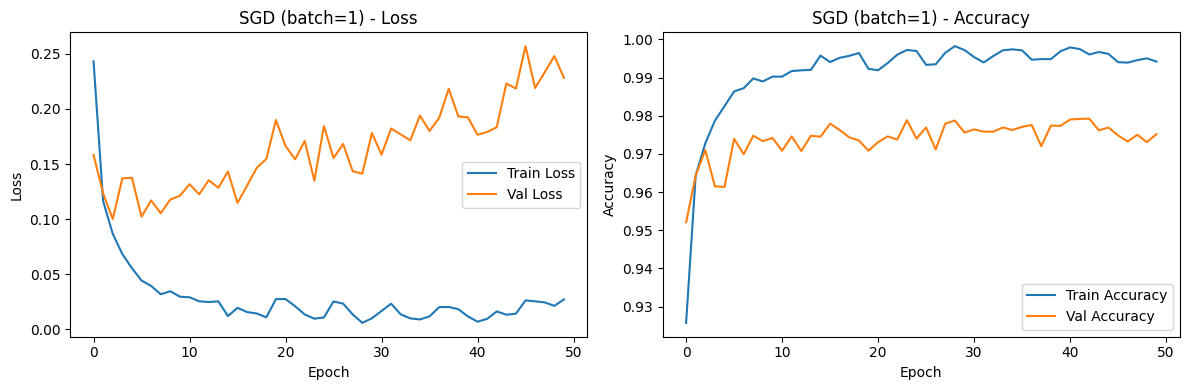

Training time: 5276.93s


In [5]:
import time
strategy = {
    'name': 'SGD (batch=1)',
    'batch_size': 1,
    'optimizer': keras.optimizers.SGD(learning_rate=0.01)
}

model = build_model()
model.compile(optimizer=strategy['optimizer'],
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

start_time = time.time()
history_sgd1 = model.fit(
    X_train, y_train,
    batch_size=strategy['batch_size'],
    epochs=50,
    validation_data=(X_val, y_val),
    verbose=0
)
training_time_sgd1 = time.time() - start_time

plot_curves(history_sgd1, strategy['name'])
print(f"Training time: {training_time_sgd1:.2f}s")

In [6]:
model_sgd1 = model

#### Mini batch SGD (64)

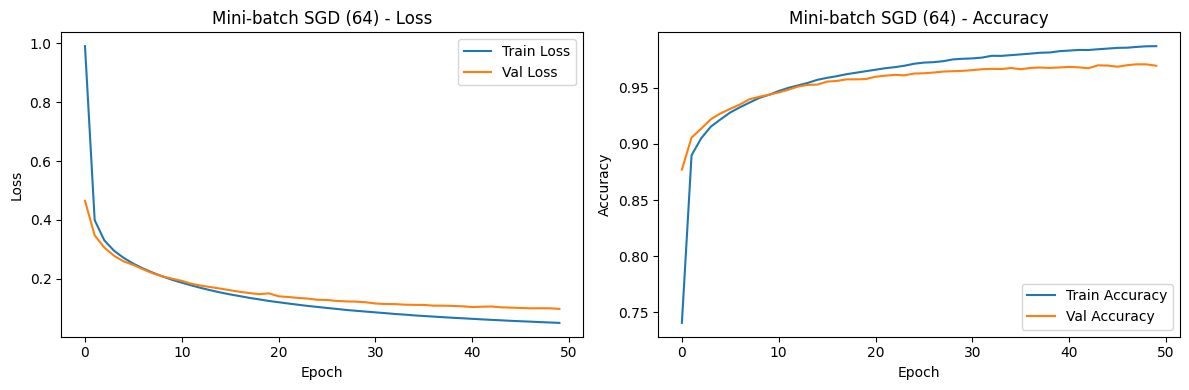

Training time: 114.40s


In [7]:
strategy = {
    'name': 'Mini-batch SGD (64)',
    'batch_size': 64,
    'optimizer': keras.optimizers.SGD(learning_rate=0.01)
}

model_mb64 = build_model()
model_mb64.compile(optimizer=strategy['optimizer'],
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

start_time = time.time()
history_mb64 = model_mb64.fit(
    X_train, y_train,
    batch_size=strategy['batch_size'],
    epochs=50,
    validation_data=(X_val, y_val),
    verbose=0
)
training_time_mb64 = time.time() - start_time

plot_curves(history_mb64, strategy['name'])
print(f"Training time: {training_time_mb64:.2f}s")

#### batch SGD

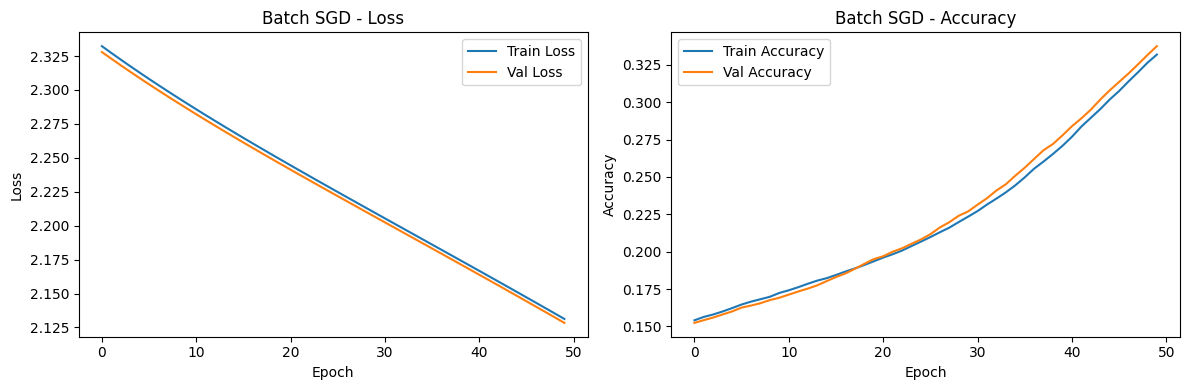

Training time: 20.84s


In [8]:
strategy = {
    'name': 'Batch SGD',
    'batch_size': len(X_train),
    'optimizer': keras.optimizers.SGD(learning_rate=0.01)
}

model_batch = build_model()
model_batch.compile(optimizer=strategy['optimizer'],
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

start_time = time.time()
history_batch = model_batch.fit(
    X_train, y_train,
    batch_size=strategy['batch_size'],
    epochs=50,
    validation_data=(X_val, y_val),
    verbose=0
)
training_time_batch = time.time() - start_time

plot_curves(history_batch, strategy['name'])
print(f"Training time: {training_time_batch:.2f}s")

### 5. Compare between the training time and the learning curves

#### Mini batch SGD with decay (1e-6)

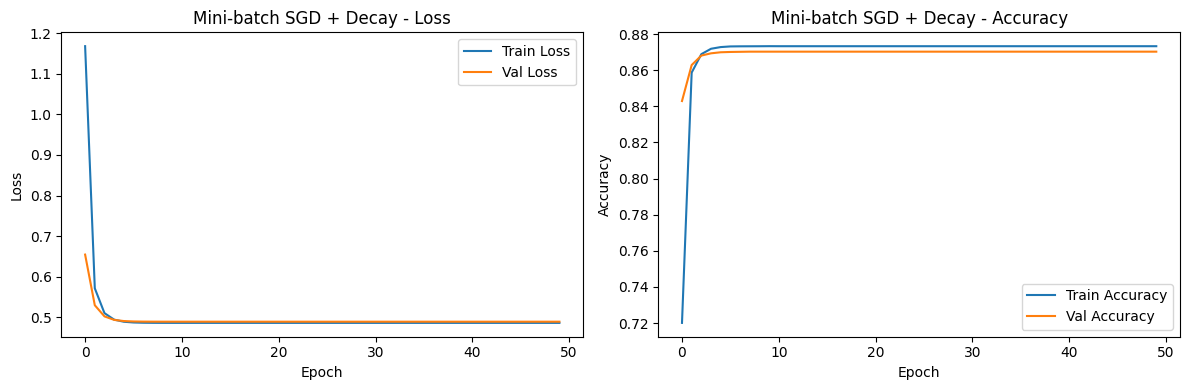

Training time: 133.28 seconds


In [11]:
decay = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=1e-6
)

model_sgd_decay = build_model()
opt_decay = keras.optimizers.SGD(learning_rate=decay)

model_sgd_decay.compile(optimizer=opt_decay,
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

start_time = time.time()
history_decay = model_sgd_decay.fit(
    X_train, y_train,
    batch_size=64,
    epochs=50,
    validation_data=(X_val, y_val),
    verbose=0
)
time_decay = time.time() - start_time

plot_curves(history_decay, 'Mini-batch SGD + Decay')
print(f"Training time: {time_decay:.2f} seconds")

#### SGD with decay (1e-6) and momentum

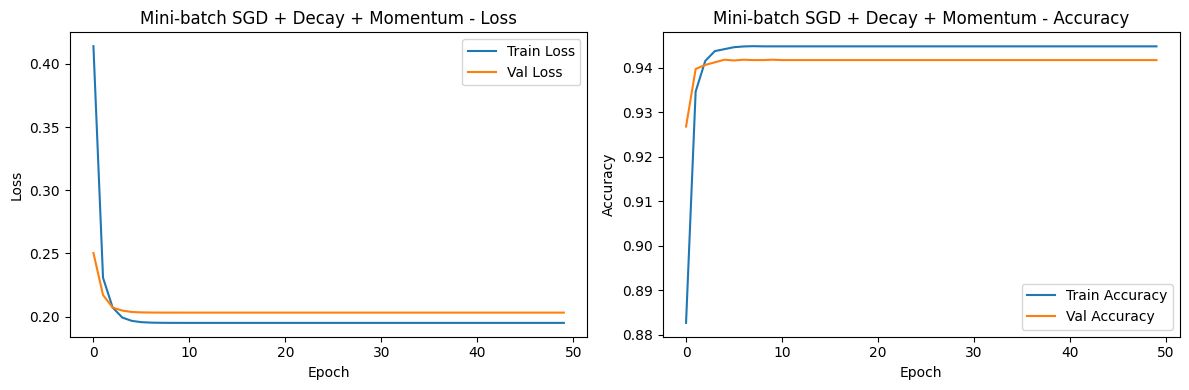

Training time: 121.99 seconds


In [15]:
model_decay_momentum = build_model()
opt_momentum = keras.optimizers.SGD(learning_rate=decay, momentum=0.9)

model_decay_momentum.compile(optimizer=opt_momentum,
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

start_time = time.time()
history_momentum = model_decay_momentum.fit(
    X_train, y_train,
    batch_size=64,  
    epochs=50,
    validation_data=(X_val, y_val),
    verbose=0
)
time_momentum = time.time() - start_time

plot_curves(history_momentum, 'Mini-batch SGD + Decay + Momentum')
print(f"Training time: {time_momentum:.2f} seconds")

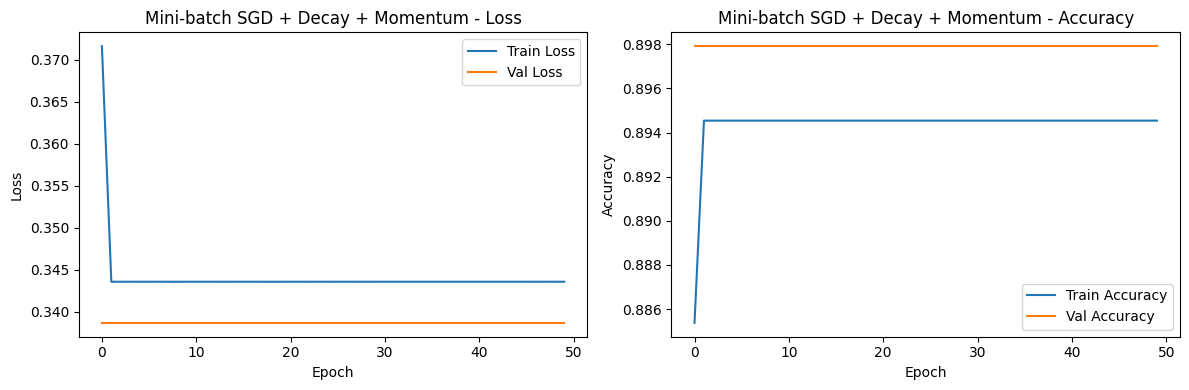

Training time: 121.99 seconds


In [22]:
model_sgd_decay_momentum = build_model()
opt_momentum = keras.optimizers.SGD(learning_rate=decay, momentum=0.9)

model_sgd_decay_momentum.compile(optimizer=opt_momentum,
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

start_time = time.time()
history_sgd_momentum = model_sgd_decay_momentum.fit(
    X_train, y_train,
    batch_size=1,  
    epochs=50,
    validation_data=(X_val, y_val),
    verbose=0
)
time_sgd_momentum = time.time() - start_time

plot_curves(history_sgd_momentum, 'Mini-batch SGD + Decay + Momentum')
print(f"Training time: {time_momentum:.2f} seconds")

In [27]:
# Table of metrics
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd

def get_metrics(model, history, y_true=y_val, X=X_val):
    y_pred = model.predict(X).argmax(axis=1)
    return {
        'Val Loss': history.history['val_loss'][-1],
        'Val Accuracy': history.history['val_accuracy'][-1],
        'Precision': precision_score(y_true, y_pred, average='macro'),
        'Recall': recall_score(y_true, y_pred, average='macro'),
        'F1 Score': f1_score(y_true, y_pred, average='macro')
    }

results = [
    {**get_metrics(model_mb64, history_mb64), 
     'Strategy': 'Mini-batch SGD', 
     'Time (s)': training_time_mb64},
    
    {**get_metrics(model_sgd_decay, history_decay), 
     'Strategy': 'Mini-batch SGD + Decay', 
     'Time (s)': time_decay},
    
    {**get_metrics(model_sgd_decay_momentum, history_momentum), 
     'Strategy': 'SGD + Decay + Momentum', 
     'Time (s)': time_sgd_momentum}
]

df = pd.DataFrame(results).set_index('Strategy').round(4)
df[['Time (s)', 'Val Loss', 'Val Accuracy', 'Precision', 'Recall', 'F1 Score']]

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Time (s),Val Loss,Val Accuracy,Precision,Recall,F1 Score
Strategy,,,,,,
Mini-batch SGD,114.4012,0.0980,0.9695,0.9694,0.9692,0.9693
Mini-batch SGD + Decay,133.2793,0.4886,0.8702,0.8689,0.8686,0.8683
SGD + Decay + Momentum,5122.7701,0.2031,0.9417,0.8970,0.8969,0.8967


### 6. Compare between SGD optimizers

#### Adam

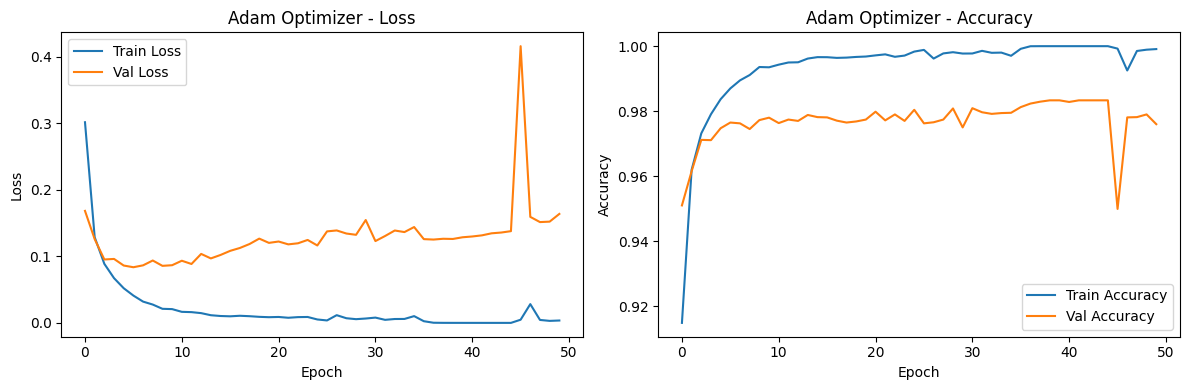

Training Time: 142.33 seconds


In [23]:
model_adam = build_model()
model_adam.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

start_time = time.time()
history_adam = model_adam.fit(
    X_train, y_train,
    batch_size=64,
    epochs=50,
    validation_data=(X_val, y_val),
    verbose=0
)
time_adam = time.time() - start_time

plot_curves(history_adam, 'Adam Optimizer')
print(f"Training Time: {time_adam:.2f} seconds")

#### RmsProp 

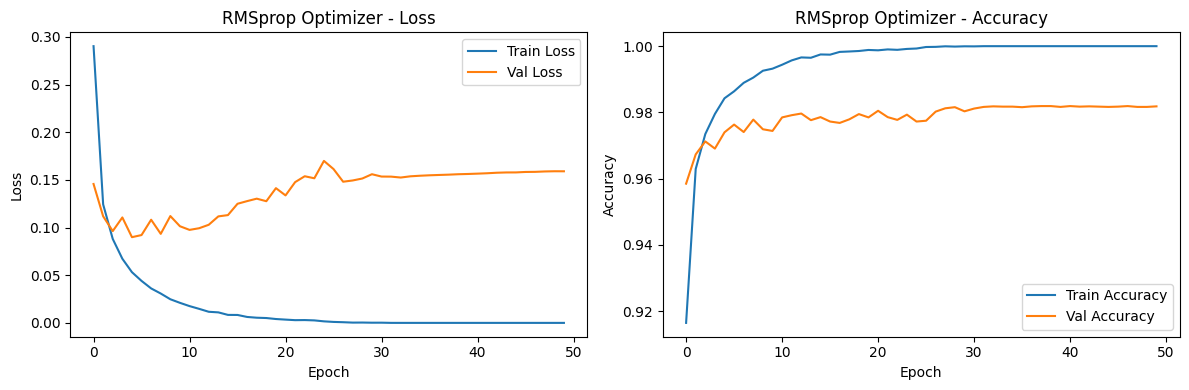

Training Time: 154.89 seconds


In [24]:
model_rms = build_model()
model_rms.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

start_time = time.time()
history_rms = model_rms.fit(
    X_train, y_train,
    batch_size=64,
    epochs=50,
    validation_data=(X_val, y_val),
    verbose=0
)
time_rms = time.time() - start_time

plot_curves(history_rms, 'RMSprop Optimizer')
print(f"Training Time: {time_rms:.2f} seconds")

#### Comparaison

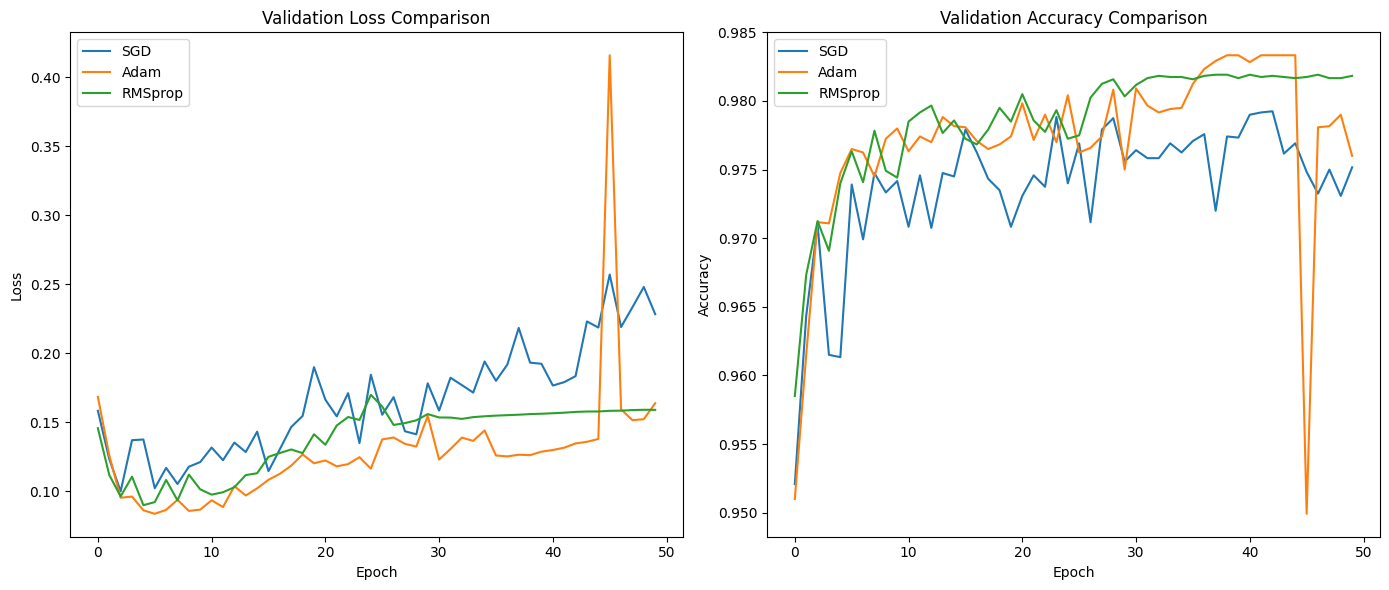

In [25]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history_sgd1.history['val_loss'], label='SGD')
plt.plot(history_adam.history['val_loss'], label='Adam')
plt.plot(history_rms.history['val_loss'], label='RMSprop')
plt.title('Validation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_sgd1.history['val_accuracy'], label='SGD')
plt.plot(history_adam.history['val_accuracy'], label='Adam')
plt.plot(history_rms.history['val_accuracy'], label='RMSprop')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd

def calculate_metrics(model, X_val, y_val):
    y_pred = model.predict(X_val).argmax(axis=1)
    return {
        'Precision': precision_score(y_val, y_pred, average='macro'),
        'Recall': recall_score(y_val, y_pred, average='macro'),
        'F1 Score': f1_score(y_val, y_pred, average='macro'),
        'Val Accuracy': model.evaluate(X_val, y_val, verbose=0)[1]
    }

results = []
for model, history, time_taken, name in zip(
    [model_sgd1, model_adam, model_rms],
    [history_sgd1, history_adam, history_rms],
    [training_time_sgd1, time_adam, time_rms],
    ['SGD', 'Adam', 'RMSprop']
):
    metrics = calculate_metrics(model, X_val, y_val)
    results.append({
        'Optimizer': name,
        'Train Loss': history.history['loss'][-1],
        'Val Loss': history.history['val_loss'][-1],
        **metrics,
        'Training Time (s)': time_taken
    })

df = pd.DataFrame(results).set_index('Optimizer').round(4)
df[['Training Time (s)', 'Val Loss', 'Val Accuracy', 'Precision', 'Recall', 'F1 Score']]

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Training Time (s),Val Loss,Val Accuracy,Precision,Recall,F1 Score
Optimizer,,,,,,
SGD,5276.9311,0.2283,0.9752,0.9750,0.9750,0.9750
Adam,142.3271,0.1638,0.9760,0.9762,0.9756,0.9759
RMSprop,154.8925,0.1590,0.9818,0.9817,0.9817,0.9817


### 7. Export the best model

In [35]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

models = {
    'SGD (batch=1)': (model_sgd1, history_sgd1),
    'Mini-batch SGD (64)': (model_mb64, history_mb64),
    'Batch SGD': (model_batch, history_batch),
    'Mini-batch SGD+Decay': (model_sgd_decay, history_decay),  
    'SGD+Decay+Momentum': (model_decay_momentum, history_sgd_momentum),  
    'Adam': (model_adam, history_adam),
    'RMSprop': (model_rms, history_rms)
}

def get_model_metrics(model, history, model_name, X_val, y_val):
    # Ensure model is compiled
    if not hasattr(model, "optimizer"):
        model.compile(
            loss='sparse_categorical_crossentropy',
            optimizer='sgd',  # Placeholder optimizer
            metrics=['accuracy']
        )
    
    y_pred = model.predict(X_val).argmax(axis=1)
    
    metrics = {
        'Model': model_name,
        'Val Loss': model.evaluate(X_val, y_val, verbose=0)[0],
        'Val Accuracy': model.evaluate(X_val, y_val, verbose=0)[1],
        'Precision': precision_score(y_val, y_pred, average='macro', zero_division=0),  # Added zero_division
        'Recall': recall_score(y_val, y_pred, average='macro'),
        'F1 Score': f1_score(y_val, y_pred, average='macro')
    }
    
    if history is not None:
        metrics.update({
            'Train Loss': history.history['loss'][-1],
            'Train Accuracy': history.history['accuracy'][-1]
        })
    else:
        metrics.update({
            'Train Loss': None,
            'Train Accuracy': None
        })
    
    return metrics

results = []
for name, (model, history) in models.items():
    try:
        results.append(get_model_metrics(model, history, name, X_val, y_val))
    except Exception as e:
        print(f"Error evaluating {name}: {str(e)}")

metrics_df = pd.DataFrame(results).set_index('Model').sort_values('Val Accuracy', ascending=False)
metrics_df = metrics_df.round(4)

def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

styled_df = metrics_df.style.apply(highlight_max, subset=['Val Accuracy', 'F1 Score'])

print("Validation Metrics Comparison:")
display(styled_df)

best_model_name = metrics_df['Val Accuracy'].idxmax()
print(f"\nBest model based on validation accuracy: {best_model_name}")

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Validation Metrics Comparison:


,Val Loss,Val Accuracy,Precision,Recall,F1 Score,Train Loss,Train Accuracy
Model,,,,,,,
RMSprop,0.159000,0.981800,0.981700,0.981700,0.981700,0.000000,1.000000
Adam,0.163800,0.976000,0.976200,0.975600,0.975900,0.003600,0.999100
SGD (batch=1),0.228300,0.975200,0.975000,0.975000,0.975000,0.027000,0.994200
Mini-batch SGD (64),0.098000,0.969500,0.969400,0.969200,0.969300,0.050300,0.986900
Mini-batch SGD+Decay,0.488600,0.870200,0.868900,0.868600,0.868300,0.485600,0.873300
Batch SGD,2.128400,0.337500,0.389500,0.336600,0.293800,2.131300,0.331900
SGD+Decay+Momentum,2.360700,0.065000,0.196000,0.064700,0.043800,0.343600,0.894500



Best model based on validation accuracy: RMSprop


In [37]:
best_model = model_rms
best_model.save('best_model.keras')

#### Make predictions on some samples from the test set

Test Accuracy: 0.9808

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


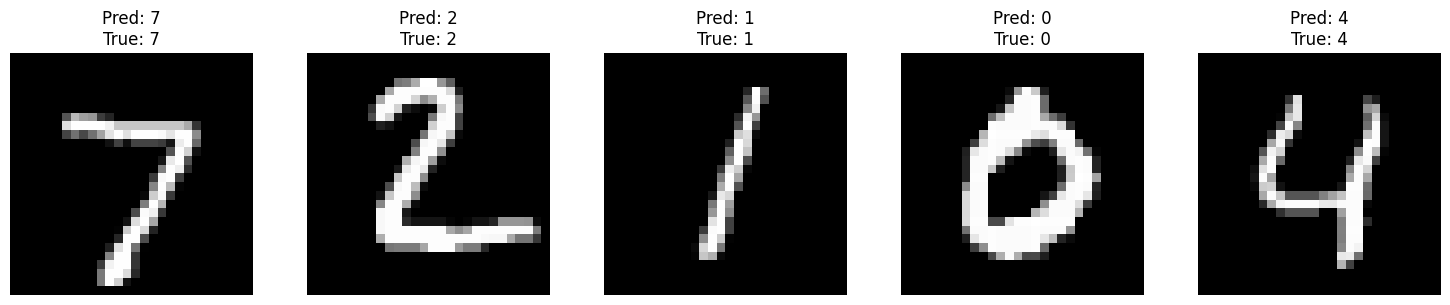

In [43]:
import matplotlib.pyplot as plt

loaded_model = keras.models.load_model('best_model.keras')

test_loss, test_acc = loaded_model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {test_acc:.4f}\n')

sample_images = X_test[:5]
predictions = loaded_model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(15, 3))
for i in range(5):
    img = sample_images[i].reshape(28, 28)
    
    plt.subplot(1, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {y_test[i]}", fontsize=12)
    plt.axis('off')

plt.tight_layout()
plt.show()